In [95]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [96]:
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
plt.rc('font',family='NanbumBarunGothic')

Decision Tree - 분류**

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth =2 ,random_state =42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [13]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(
    tree_clf,
    feature_names = ['꽃잎 길이 (cm)' , '꽃잎 너비 (cm)'],
    class_names = iris.target_names,
    rounded = True,
    filled=True
)

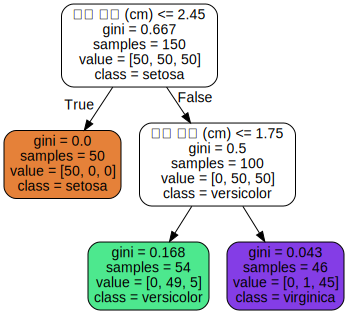

In [15]:
graph =graphviz.Source(dot_data)
graph

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [24]:
wine = pd.read_csv('./wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


Learning rate set to 0.020824
0:	learn: 0.6419428	total: 3.72ms	remaining: 3.71s
200:	learn: 0.0138379	total: 646ms	remaining: 2.57s
400:	learn: 0.0069287	total: 1.27s	remaining: 1.89s
600:	learn: 0.0047265	total: 1.88s	remaining: 1.25s
800:	learn: 0.0038691	total: 2.5s	remaining: 622ms
999:	learn: 0.0036723	total: 3.11s	remaining: 0us
pred [1 1 0 ... 0 0 0]
mse 0.0038461538461538464


Text(0.5, 0, 'CatBoost Feature Importance')

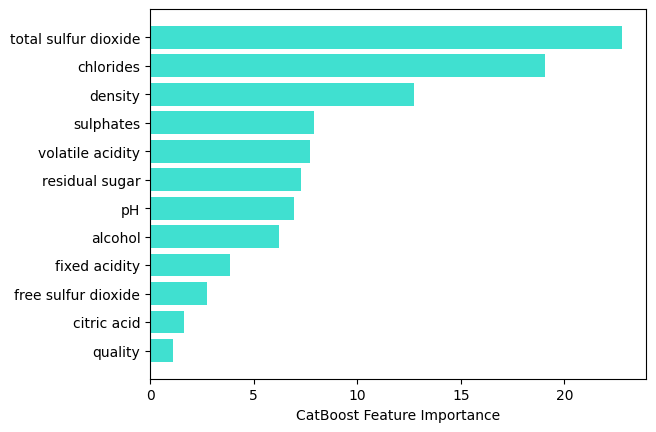

In [30]:
!pip install catboost

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

X = wine.drop(labels='class',axis=1)
y = wine['class']

MMS = RobustScaler()
MMS_X = MMS.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(MMS_X,y, test_size=0.2,random_state=777)


cbc = CatBoostClassifier(depth=7,verbose = 200)
cbc.fit(X_train, y_train)

predict = cbc.predict(X_test)


print('pred',predict)
from sklearn.metrics import mean_squared_error
print('mse',mean_squared_error (y_test, predict))

sorted_feature_importance = cbc.feature_importances_.argsort()
plt.barh(np.array(list(X))[sorted_feature_importance],
        cbc.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")


lightgbm


In [27]:

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X = wine.drop(labels='class',axis=1)
y = wine['class']

MMS = RobustScaler()
MMS_X = MMS.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(MMS_X,y, test_size=0.2,random_state=777)

lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(X_train, y_train)
predict = lgb_clf.predict(X_test)

print('pred',predict)
from sklearn.metrics import mean_squared_error
print('mse',mean_squared_error (y_test, predict))



[LightGBM] [Info] Number of positive: 1287, number of negative: 3910
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1543
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247643 -> initscore=-1.111223
[LightGBM] [Info] Start training from score -1.111223
pred [1 1 0 ... 0 0 0]
mse 0.006923076923076923


xgboost

In [28]:
import xgboost as xgb

X = wine[['residual sugar','density','free sulfur dioxide','chlorides','sulphates']]
y = wine['class']

MMS = RobustScaler()
MMS_X = MMS.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(MMS_X,y, test_size=0.2,random_state=777)

# 모델 선언
model = xgb.XGBClassifier()

model.fit(X_train,y_train)

predict=model.predict(X_test)

print('pred',predict)
from sklearn.metrics import mean_squared_error
print('mse',mean_squared_error (y_test, predict))


pred [1 1 0 ... 0 0 0]
mse 0.01769230769230769


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

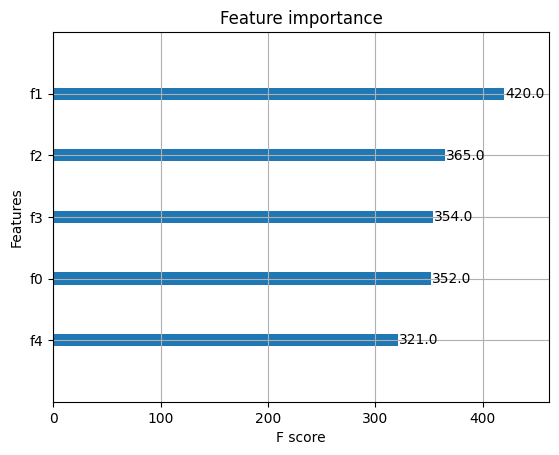

In [31]:
  xgb.plot_importance(model,)

In [14]:
  xgb.plot_tree(model, num_trees=0, rankdir='LR')

  fig = plt.gcf()
  fig.set_size_inches(150, 100)

  # 이미지 저장하고 싶다면
  # fig.savefig('tree.png')

  plt.show()

In [49]:
red_wine = wine[wine['class']==1]
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,1.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.0


In [50]:
white_wine = wine[wine['class']==0]
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,0.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,0.0


확인결과 상위 5개의 feature importance 는
chlorides      
density     
volatile acidity     
residual sugar    
fixed acidty    
였으며 각수치의 레드 :화이트 값은

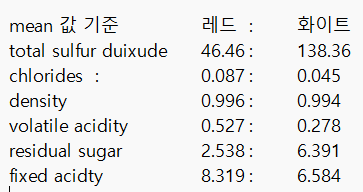
였다